In [63]:
import ast
import numpy as np
import math
from io import StringIO   # StringIO behaves like a file object

# Example string representation of a list of arrays
s = [[-1.6, 1.6], [0.0, 0.2], [1.6, -1.5], [-0.3904283036630054, 1.7733954694075118], [1.9216251513618485, -0.7582546883209562], [-1.314560142568316, -1.2063138664089443]]

r = [math.dist([-1.6, 1.6], i) for i in s]

# Convert the string to a list using ast.literal_eval()
#list_of_arrays = ast.literal_eval(string_list_of_arrays)
test = np.array(s)

# Convert each element of the list to a numpy array
#list_of_arrays = [np.array(arr) for arr in list_of_arrays]
a = np.array([-1.6, 1.6])

f = np.argwhere(test==a)[0][0]
p = np.delete(s, np.argwhere(test==a)[0][0], axis=0)
print(f, p, p.shape, test.shape)
temp = [np.sqrt(np.sum(np.square(a - other_pos))) 
                    for other_pos in p]
print(r, "\n", temp)
# Shorter and returns the same values
temp2 = np.linalg.norm(a-p, axis=1)
print(r, "\n", temp2)


0 [[ 0.          0.2       ]
 [ 1.6        -1.5       ]
 [-0.3904283   1.77339547]
 [ 1.92162515 -0.75825469]
 [-1.31456014 -1.20631387]] (5, 2) (6, 2)
[0.0, 2.12602916254693, 4.455333881989093, 1.2219368549113354, 4.238302594399335, 2.8207930496599247] 
 [2.12602916254693, 4.455333881989093, 1.2219368549113354, 4.238302594399335, 2.8207930496599247]
[0.0, 2.12602916254693, 4.455333881989093, 1.2219368549113354, 4.238302594399335, 2.8207930496599247] 
 [2.12602916 4.45533388 1.22193685 4.23830259 2.82079305]


In [48]:
# Tester for cohesion computation equation
t = np.array([2.61527602, 0.97435475, 2.11814372, 0.02357945, 0.16845774])
print(t.dtype)
size = 0.15
scaler = 1
r = np.where((t-size)<0, 0, t-size)
p = 1 / (1 + r * scaler)
print(r)
print(p)

float64
[2.46527602 0.82435475 1.96814372 0.         0.01845774]
[0.2885773  0.54813901 0.33691091 1.         0.98187677]


In [6]:
# Tester for array sorting based on norm
import numpy as np

def l2_norm(vector):
    return np.linalg.norm(vector)

def sort_by_l2_norm(vals, length, pad_value=[0,0]):

    norms = [np.linalg.norm(val) for val in vals]
    pairs = list(zip(vals, norms))
    sorted_pairs = sorted(pairs, key=lambda x: x[1])
    temp = [pair[0] for pair in sorted_pairs]

    temp = temp[:length] + [np.array(pad_value)] * max(0, length - len(temp))
    
    return temp

# Example usage:
vectors = [
    np.array([1, 2, 3]),
    np.array([4, 5, 6]),
    np.array([1, 1, 1])
]


temp = np.array([[9,12], [3, 4], [6,8],[12,16]])

sorted_vectors = sort_by_l2_norm(temp, 3)
sorted_vectors


[array([3, 4]), array([6, 8]), array([ 9, 12])]

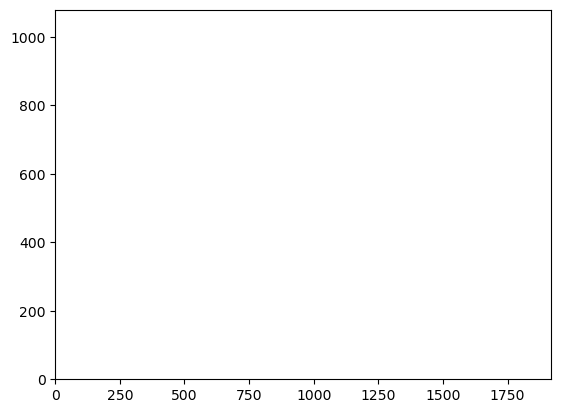

In [1]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.set_xlim(0, 1920-1)
ax.set_ylim(0, 1080-1)

x,y = [0], [0]
# create empty plot
points, = ax.plot([], [], 'o')

# cache the background
background = fig.canvas.copy_from_bbox(ax.bbox)

def on_move(event):
    # append event's data to lists
    x.append(event.xdata)
    y.append(event.ydata)
    # update plot's data  
    points.set_data(x,y)
    # restore background
    fig.canvas.restore_region(background)
    # redraw just the points
    ax.draw_artist(points)
    # fill in the axes rectangle
    fig.canvas.blit(ax.bbox)


fig.canvas.mpl_connect("motion_notify_event", on_move)
plt.show()